<a href="https://colab.research.google.com/github/saniaaa111/FMML_Project_and_Labs/blob/main/Mod9_Project_Breast_Cancer_Prediction_with_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### Project for Module 9: Multi Layer Perceptron
#### Module Coordinator: Shantanu Agrawal

# Breast cancer prediction with an MLP Classifier



### Dataset Used: Breast Cancer Wisconsin (Diagnostic) Dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# Load the dataset
!pip install gdown
!gdown 1ndwj3XxQpw7rEuAYiImeGonCay7KGS9p
!unzip archive.zip

Downloading...
From: https://drive.google.com/uc?id=1ndwj3XxQpw7rEuAYiImeGonCay7KGS9p
To: /content/archive.zip
100% 49.8k/49.8k [00:00<00:00, 48.8MB/s]
Archive:  archive.zip
  inflating: data.csv                


In [2]:
# Required imports
# Note that we shall be using the sklearn module for easy experimentation.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline

### Step 1: Exploratory Data Analysis (EDA)
We perform EDA on the data to help gain an understanding of it. This is an essential step before doing anything with that data and will help us get better results as well as interpret the results better.

In [3]:
# Get first 5 rows of the data to see features
breast_cancer = pd.read_csv('data.csv')
breast_cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Get counts and data types for the attributes
breast_cancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Print out the shape of the dataframe
breast_cancer.shape


(569, 33)

In [6]:
# Print out some statistics for the data
breast_cancer.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# Number of samples in each class
breast_cancer.groupby('diagnosis').size()


diagnosis
B    357
M    212
dtype: int64

### Step 2: Feature Engineering

In [8]:
# Features "id" and "Unnamed: 32" are not useful so we remove them
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# "diagnosis" feature is our class which form the label
y = breast_cancer.diagnosis


#### Transforming the prediction target

In [9]:
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)


#### Correlation Matrix
A matrix of correlations provides useful insight into relationships between pairs of variables.

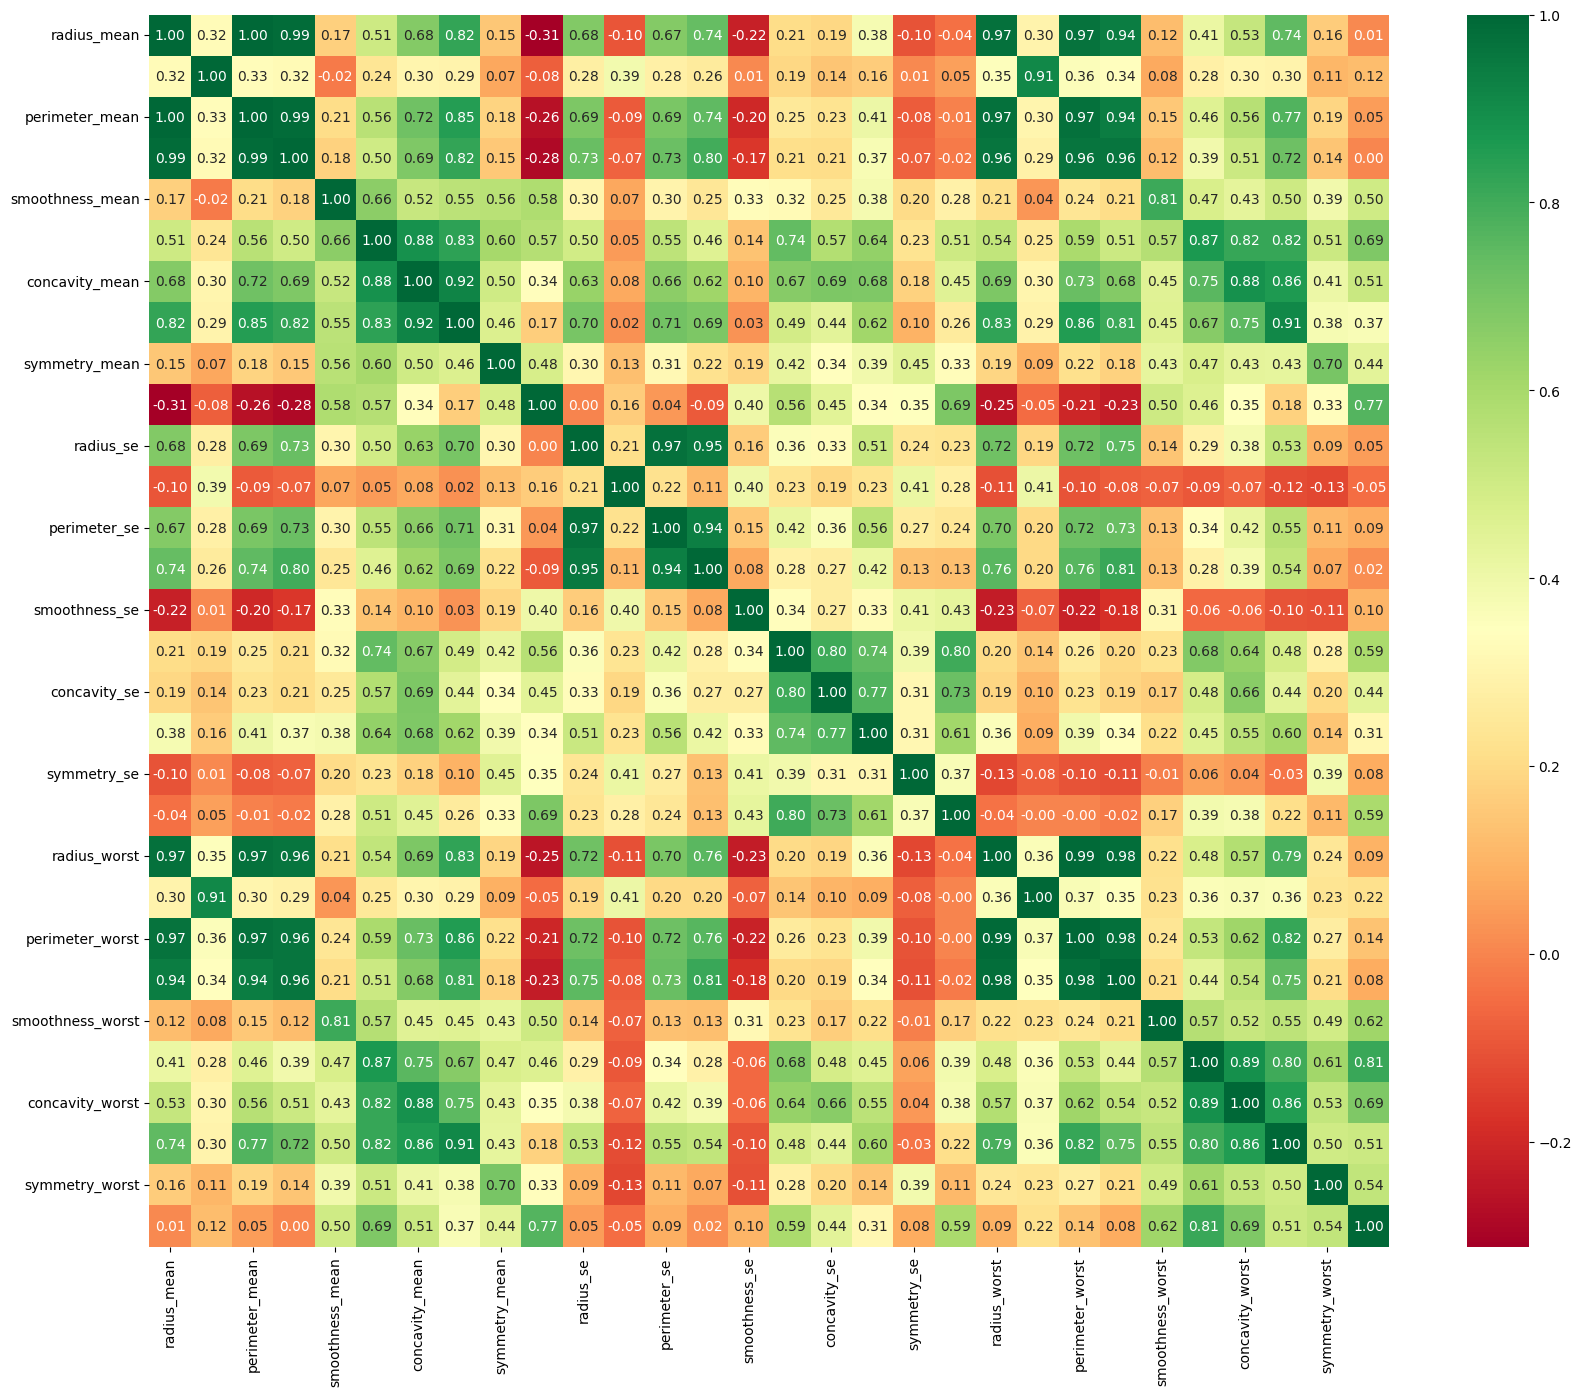

In [10]:
sns.heatmap(
    data=X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

fig = plt.gcf()
fig.set_size_inches(20, 16)

plt.show()


### Step 3: Multi-layer Perceptron classifier evaluation after Pipeline and GridSearchCV usage

We use the sklearn MLPClassifier to create our classifier and train it. In case you do not understand any of the code, I encourage you to check out the documentation first, and if you still do not understand, reach out to a TA.

#### Model Parameter Tuning
[GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) returns the set of parameters which have an imperceptible impact on model evaluation. Model parameter tuning with other steps like data preprocessing and cross-validation splitting strategy can be automated by [Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class.

#### Data standardization
[Preprocessing data](http://scikit-learn.org/stable/modules/preprocessing.html) provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

Let's start with defining the Pipeline instance. In this case we can use different approaches like `Normalizer`, `MinMaxScaler`, `StandardScaler`, `RobustScaler`, `QuantileTransformer` for data preprocesing and `MLPClassifier` for classification.

In [11]:
pipe = Pipeline(steps=[
    ('preprocess', StandardScaler()),
    ('classification', MLPClassifier())
])


Next, we need to prepare attributes with values for above steps which wanna to check by the model parameter tuning process: `activation`, `solver`, `max_iter` and `alpha`.

In [12]:
random_state = 42
mlp_activation = ['tanh', 'relu']
mlp_solver = ['sgd', 'adam']
mlp_max_iter = range(1000, 10000, 5000)
mlp_alpha = [0.01, 0.1, 1]
preprocess = [MinMaxScaler(), StandardScaler()]


Next, we need to prepare supported combinations for classifier parameters including above attributes. In Multi-layer Perceptron classifier case we don't use PCA or any other feature selection techniques.

In [13]:
mlp_param_grid = [
    {
        'preprocess': preprocess,
        'classification__activation': mlp_activation,
        'classification__solver': mlp_solver,
        'classification__random_state': [random_state],
        'classification__max_iter': mlp_max_iter,
        'classification__alpha': mlp_alpha
    }
]


Next, we need to prepare cross-validation splitting strategy object with `StratifiedKFold` and passed it with others to `GridSearchCV`. We use the `f1 score` metric.

In [14]:
strat_k_fold = StratifiedKFold(
    n_splits=5,
)

mlp_grid = GridSearchCV(
    pipe,
    param_grid=mlp_param_grid,
    cv=strat_k_fold,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

mlp_grid.fit(X, y)

# Best MLPClassifier parameters
print(mlp_grid.best_params_)
# Best score for MLPClassifier with best parameters
print('\nBest F1 score for MLP: {:.2f}%'.format(mlp_grid.best_score_ * 100))

best_params = mlp_grid.best_params_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'classification__activation': 'tanh', 'classification__alpha': 1, 'classification__max_iter': 1000, 'classification__random_state': 42, 'classification__solver': 'adam', 'preprocess': StandardScaler()}

Best F1 score for MLP: 97.39%


#### Model evaluation

Finally, we can establish the best parameters values which we pass to new feature selection and classifier instances. For example if `best_params` returned `StandardScaler` for data preprocessing and `1000`, `1`, `'tanh'` and `'adam'` values for `max_iter`, `alpha`, `activation` and `solver` classifier attributes, we use the code as below. Your result may vary so you should use whatever yielded the best parameters for you.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.32
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(386, 30) (386,)
(183, 30) (183,)


In [16]:
scaler = StandardScaler()

print('\nData preprocessing with {scaler}\n'.format(scaler=scaler))

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

mlp = MLPClassifier(
    max_iter=1000,
    alpha=1,
    activation='tanh',
    solver='adam',
    random_state=42
)
mlp.fit(X_train_scaler, y_train)

mlp_predict = mlp.predict(X_test_scaler)
mlp_predict_proba = mlp.predict_proba(X_test_scaler)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(X_train_scaler, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test_scaler, y_test) * 100))



Data preprocessing with StandardScaler()

MLP Accuracy: 98.36%
MLP AUC: 99.71%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.99      0.98      0.99       119
           1       0.97      0.98      0.98        64

    accuracy                           0.98       183
   macro avg       0.98      0.98      0.98       183
weighted avg       0.98      0.98      0.98       183

MLP Training set score: 98.70%
MLP Testing set score: 98.36%


#### Confusion Matrix

Also known as an Error Matrix, is a specific table layout that allows visualization of the performance of an algorithm. The table has
two rows and two columns that reports the number of False Positives (FP), False Negatives (FN), True Positives (TP) and True Negatives (TN). This allows more detailed analysis than accuracy.

<Axes: >

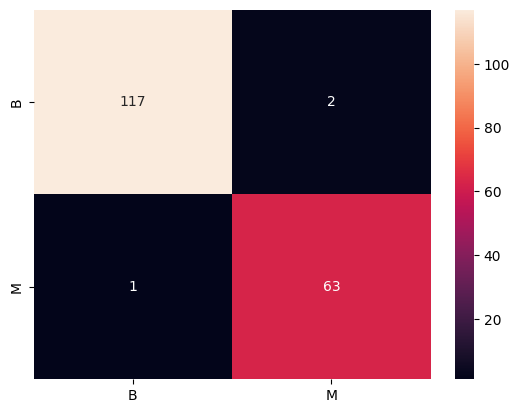

In [17]:
outcome_labels = sorted(breast_cancer.diagnosis.unique())

# Confusion Matrix for MLPClassifier
sns.heatmap(
    confusion_matrix(y_test, mlp_predict),
    annot=True,
    fmt="d",
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)


#### Receiver Operating Characteristic (ROC)

[ROC curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

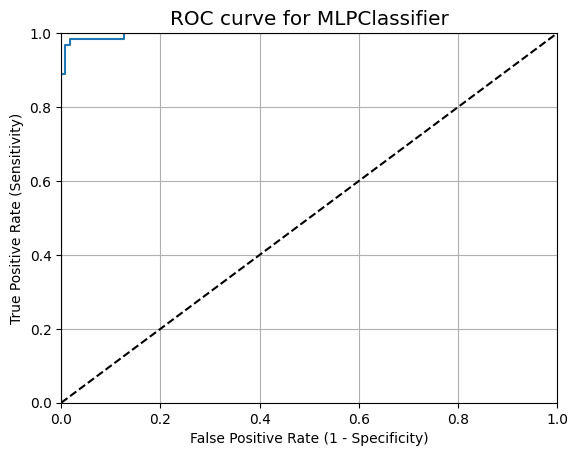

In [18]:
# ROC for MLPClassifier
fpr, tpr, thresholds = roc_curve(y_test, mlp_predict_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for MLPClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


#### F1-score after 5-fold cross-validation

In [21]:
strat_k_fold = StratifiedKFold(
    n_splits=5,
    )

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

fe_score = cross_val_score(
    mlp,
    X_std,
    y,
    cv=strat_k_fold,
    scoring='f1'
)

print("MLP: F1 after 5-fold cross-validation: {:.2f}% (+/- {:.2f}%)".format(
    fe_score.mean() * 100,
    fe_score.std() * 2
))


MLP: F1 after 5-fold cross-validation: 97.39% (+/- 0.02%)


### Final step: Conclusions (Fill in your results)

After the application of data standardization and tuning the classifier parameters we achieve the following results:

* Accuracy:
* F1-score:
* Precision:
* Recall:



Downloading...
From: https://drive.google.com/uc?id=1ndwj3XxQpw7rEuAYiImeGonCay7KGS9p
To: /content/archive.zip
100% 49.8k/49.8k [00:00<00:00, 40.3MB/s]
Archive:  archive.zip
  inflating: data.csv                


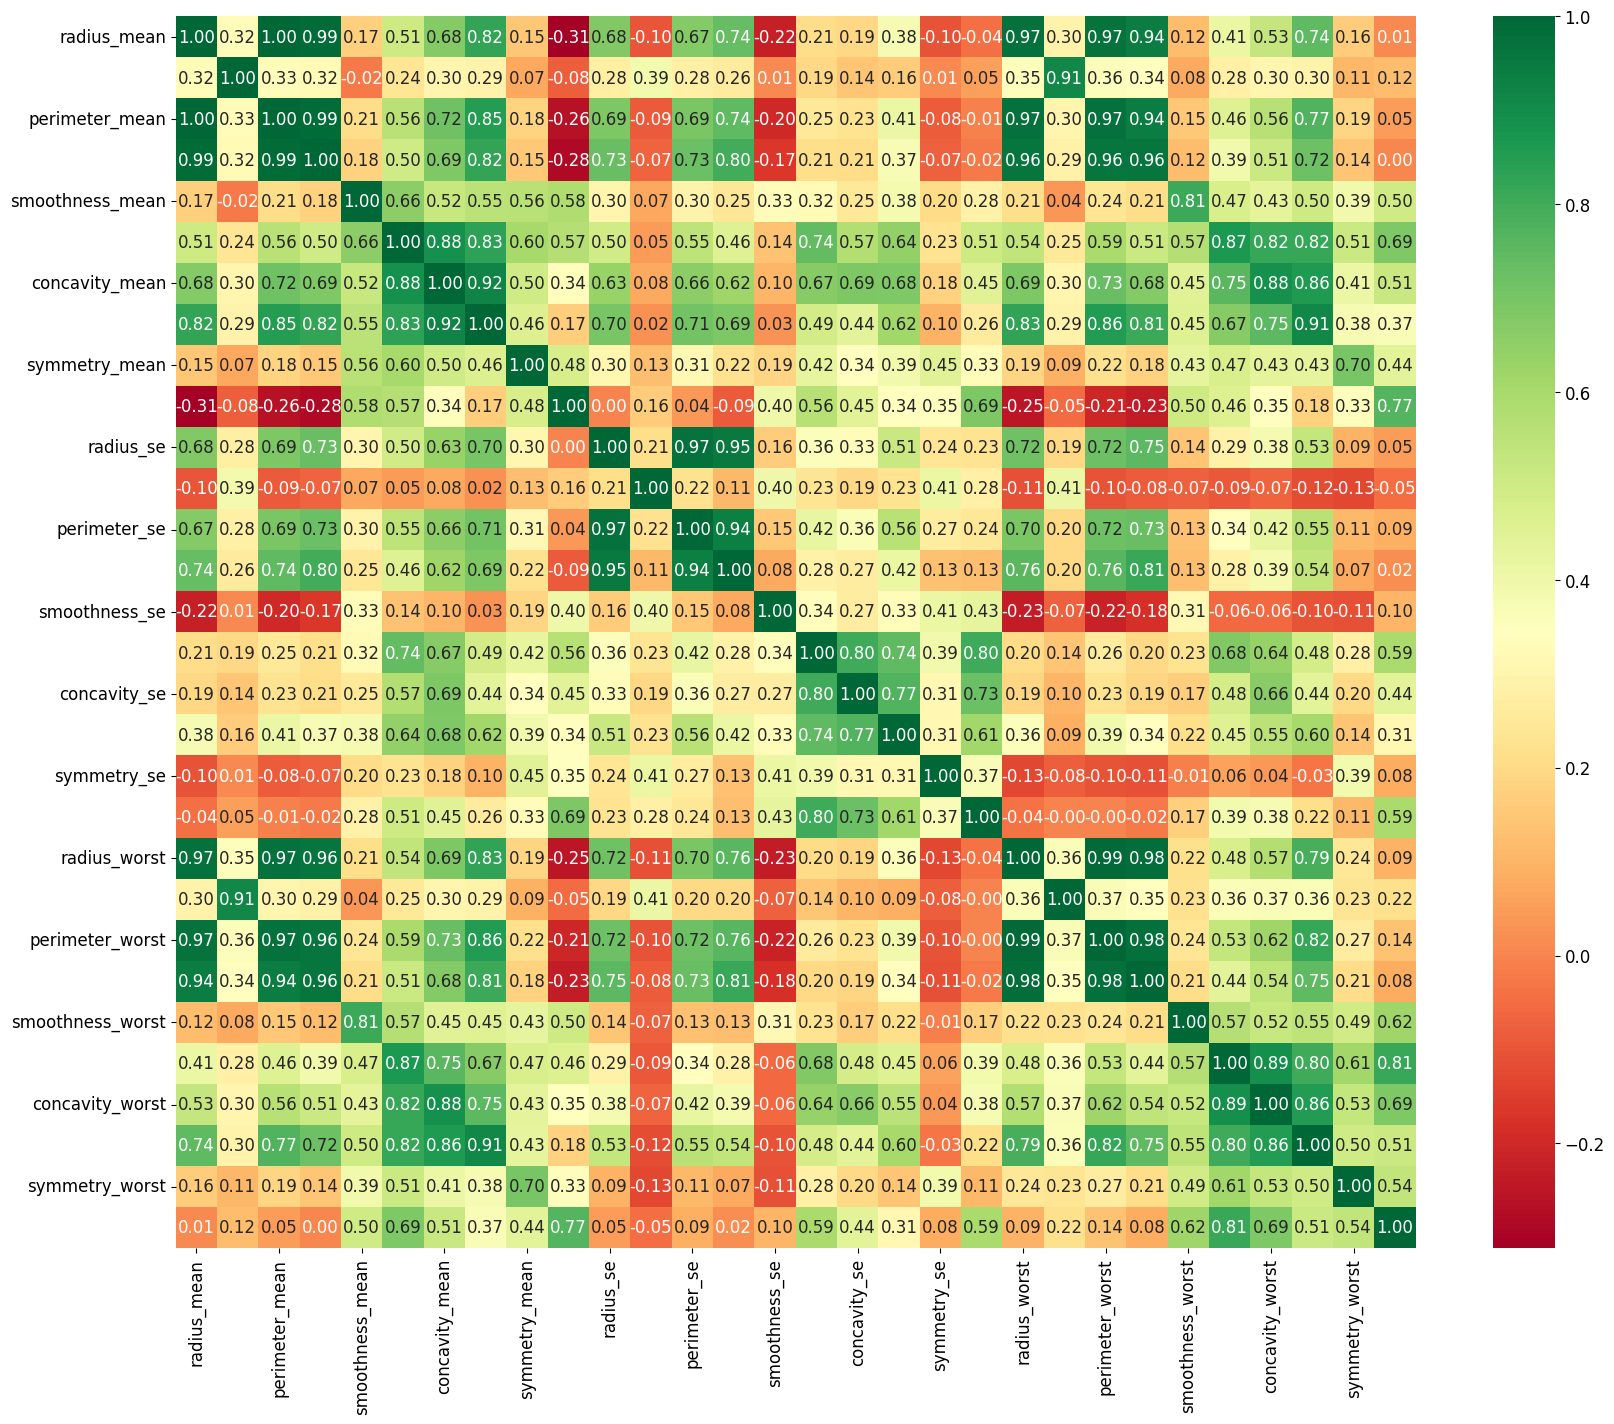

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'classification__activation': 'tanh', 'classification__alpha': 1, 'classification__max_iter': 1000, 'classification__random_state': 42, 'classification__solver': 'adam', 'preprocess': StandardScaler()}

Best F1 score for MLP: 97.39%
(386, 30) (386,)
(183, 30) (183,)

Data preprocessing with StandardScaler()

MLP Accuracy: 98.36%
MLP AUC: 99.71%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.99      0.98      0.99       119
           1       0.97      0.98      0.98        64

    accuracy                           0.98       183
   macro avg       0.98      0.98      0.98       183
weighted avg       0.98      0.98      0.98       183

MLP Training set score: 98.70%
MLP Testing set score: 98.36%


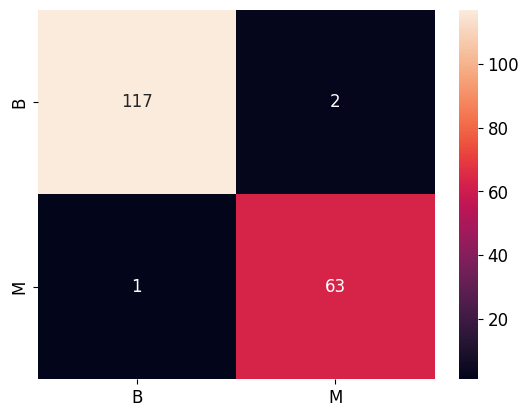

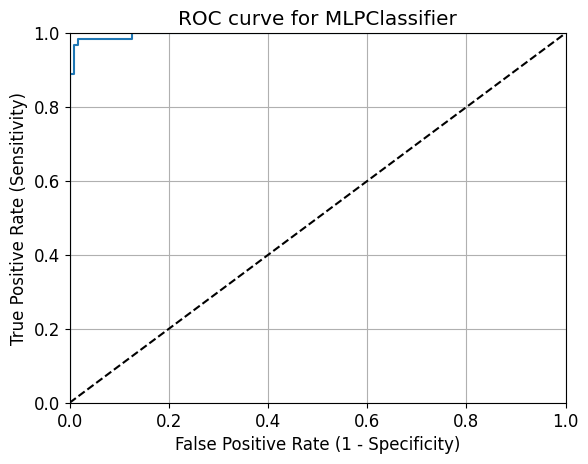

MLP: F1 after 5-fold cross-validation: 97.39% (+/- 0.02%)


In [26]:
# Install necessary packages
!pip install gdown -q

# Download the dataset
!gdown 1ndwj3XxQpw7rEuAYiImeGonCay7KGS9p

# Automatically extract files, replacing existing ones without prompts
!unzip -o archive.zip

# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Load and preprocess the data
breast_cancer = pd.read_csv('data.csv')
breast_cancer = breast_cancer.drop(['id', 'Unnamed: 32'], axis=1)

# Features and labels
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer['diagnosis']

# Encode labels
class_le = LabelEncoder()
y = class_le.fit_transform(y)

# Heatmap of correlations
sns.heatmap(
    data=X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)
fig = plt.gcf()
fig.set_size_inches(20, 16)
plt.show()

# Pipeline and grid search parameters
pipe = Pipeline(steps=[
    ('preprocess', StandardScaler()),
    ('classification', MLPClassifier())
])

random_state = 42
mlp_activation = ['tanh', 'relu']
mlp_solver = ['sgd', 'adam']
mlp_max_iter = [1000, 5000, 10000]
mlp_alpha = [0.01, 0.1, 1]
preprocess = [StandardScaler()]

mlp_param_grid = [
    {
        'preprocess': preprocess,
        'classification__activation': mlp_activation,
        'classification__solver': mlp_solver,
        'classification__random_state': [random_state],
        'classification__max_iter': mlp_max_iter,
        'classification__alpha': mlp_alpha
    }
]

strat_k_fold = StratifiedKFold(n_splits=5)

mlp_grid = GridSearchCV(
    pipe,
    param_grid=mlp_param_grid,
    cv=strat_k_fold,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Perform grid search
mlp_grid.fit(X, y)

# Best parameters and best score
print(mlp_grid.best_params_)
print('\nBest F1 score for MLP: {:.2f}%'.format(mlp_grid.best_score_ * 100))

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.32
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

scaler = StandardScaler()

print('\nData preprocessing with {scaler}\n'.format(scaler=scaler))

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Train MLP with best parameters
best_params = mlp_grid.best_params_

mlp = MLPClassifier(
    max_iter=best_params['classification__max_iter'],
    alpha=best_params['classification__alpha'],
    activation=best_params['classification__activation'],
    solver=best_params['classification__solver'],
    random_state=best_params['classification__random_state']
)
mlp.fit(X_train_scaler, y_train)

mlp_predict = mlp.predict(X_test_scaler)
mlp_predict_proba = mlp.predict_proba(X_test_scaler)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(X_train_scaler, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test_scaler, y_test) * 100))

outcome_labels = sorted(class_le.inverse_transform([0, 1]))

# Confusion Matrix for MLPClassifier
sns.heatmap(
    confusion_matrix(y_test, mlp_predict),
    annot=True,
    fmt="d",
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)
plt.show()

# ROC for MLPClassifier
fpr, tpr, thresholds = roc_curve(y_test, mlp_predict_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for MLPClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

# Cross-validation F1 score
strat_k_fold = StratifiedKFold(n_splits=5)

X_std = scaler.fit_transform(X)

fe_score = cross_val_score(
    mlp,
    X_std,
    y,
    cv=strat_k_fold,
    scoring='f1'
)

print("MLP: F1 after 5-fold cross-validation: {:.2f}% (+/- {:.2f}%)".format(
    fe_score.mean() * 100,
    fe_score.std() * 2
))


### Final step: Conclusions (Fill in your results)

After the application of data standardization and tuning the classifier parameters we achieve the following results:

* Accuracy:  98.36%
* F1-score:   For class 0, F1-score is 0.99, and for class 1, F1-score is 0.98.
* Precision:  For class 0 (benign tumors), precision is 0.99, and for class 1 (malignant tumors), precision is 0.97.
* Recall: For class 0, recall is 0.98, and for class 1, recall is also 0.98.
